# DIWALI SALES ANALYSIS

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
''' Defining the Dataframe for the Sales Data '''
''' Using v1 to define versions of the dataframe to track different transformed version '''

diwali_sales_raw_csv_path = r"C:\Users\Manavesh\OneDrive\Desktop\Manu\Python_VS_Code\PANDAS_COURSE_PROJECT_MATERIAL\Diwali Sales Data.csv"
diwali_df_v1 = pd.read_csv(diwali_sales_raw_csv_path, encoding="unicode_escape")

In [98]:
''' Data Rows/Columns Count '''

print(f"Number Of Rows - {diwali_df_v1.shape[0]}")
print(f"Number Of Columns - {diwali_df_v1.shape[1]}")

Number Of Rows - 11251
Number Of Columns - 15


In [99]:
''' Data Preview '''

diwali_df_v1.head(10)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [100]:
''' Get Summary of All Columns in the Dataset '''

diwali_df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [101]:
''' Column Wise Null Analysis '''

for column in diwali_df_v1.columns:
    print(f"{column} Column Null Values: {pd.isnull(diwali_df_v1[column]).sum()}")
    print(f"{column} Column Not Null Values: {pd.notnull(diwali_df_v1[column]).sum()}")
    print()


User_ID Column Null Values: 0
User_ID Column Not Null Values: 11251

Cust_name Column Null Values: 0
Cust_name Column Not Null Values: 11251

Product_ID Column Null Values: 0
Product_ID Column Not Null Values: 11251

Gender Column Null Values: 0
Gender Column Not Null Values: 11251

Age Group Column Null Values: 0
Age Group Column Not Null Values: 11251

Age Column Null Values: 0
Age Column Not Null Values: 11251

Marital_Status Column Null Values: 0
Marital_Status Column Not Null Values: 11251

State Column Null Values: 0
State Column Not Null Values: 11251

Zone Column Null Values: 0
Zone Column Not Null Values: 11251

Occupation Column Null Values: 0
Occupation Column Not Null Values: 11251

Product_Category Column Null Values: 0
Product_Category Column Not Null Values: 11251

Orders Column Null Values: 0
Orders Column Not Null Values: 11251

Amount Column Null Values: 12
Amount Column Not Null Values: 11239

Status Column Null Values: 11251
Status Column Not Null Values: 0

unnamed

In [102]:
''' Rows Filtered in Dataframe where Amount Column is Null/NaN '''

diwali_df_v1[diwali_df_v1["Amount"].isna()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN,NaN,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN,NaN,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN,NaN,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN,NaN,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN,NaN,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN,NaN,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN,NaN,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN,NaN,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN,NaN,NaN


##### Through Null Analysis we find the Columns - Status & unnamed1 are completely Null while Amount Column has some Null Values. <br> Hence, we'll proceed to drop the Status & unnamed1 Columns and the rows where Amount is Null since as a part of Data Cleaning

In [103]:
''' Creating Version-2 (diwali_df_v2) of Dataframe to drop the Null Values & Column, preserving the Raw Version of Dataframe'''

diwali_df_v2 = diwali_df_v1.copy()
diwali_df_v2.drop(["Status","unnamed1"], axis=1, inplace=True) ## Null Columns Dropped ##
diwali_df_v2.dropna(subset=["Amount"],inplace=True) ## Rows having Null Amount Dropped ##

In [104]:
''' Renaming Column Names Properly & Uniformly'''

diwali_df_v2.rename(columns={"User_ID":"User ID"},inplace=True)
diwali_df_v2.rename(columns={"Product_ID":"Product ID"},inplace=True)
diwali_df_v2.rename(columns={"Amount":"Order Amount"},inplace=True)
diwali_df_v2.rename(columns={"Cust_name":"Customer Name"},inplace=True)
diwali_df_v2.rename(columns={"Marital_Status":"Marital Status"},inplace=True)
diwali_df_v2.rename(columns={"Product_Category":"Product Category"},inplace=True)
diwali_df_v2.head(5)


,User ID,Customer Name,Product ID,Gender,Age Group,Age,Marital Status,State,Zone,Occupation,Product Category,Orders,Order Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [105]:
''' Data Type Analysis '''

diwali_df_v2.dtypes

User ID               int64
Customer Name        object
Product ID           object
Gender               object
Age Group            object
Age                   int64
Marital Status        int64
State                object
Zone                 object
Occupation           object
Product Category     object
Orders                int64
Order Amount        float64
dtype: object

In [106]:
''' Changing Certain Data Types for optimized Memory Usage'''

diwali_df_v2 = diwali_df_v2.astype({"Age":np.int16, "Orders":np.int32, "Marital Status":np.int16})
diwali_df_v2.dtypes

User ID               int64
Customer Name        object
Product ID           object
Gender               object
Age Group            object
Age                   int16
Marital Status        int16
State                object
Zone                 object
Occupation           object
Product Category     object
Orders                int32
Order Amount        float64
dtype: object

In [107]:
''' Creating Version - 3 '''

diwali_df_v3 = diwali_df_v2.copy()
 

In [108]:
''' Replacing Boolean Values to Married/Unmarried in Martial Status'''

diwali_df_v3["Marital_Status"] = np.where(diwali_df_v3["Marital Status"] == 0, "Married","Not Married")
diwali_df_v3.head(5)

,User ID,Customer Name,Product ID,Gender,Age Group,Age,Marital Status,State,Zone,Occupation,Product Category,Orders,Order Amount,Marital_Status
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,Married
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,Not Married
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,Not Married
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,Married
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,Not Married


In [109]:
''' Basic Stats about certain Attributes (Columns) in Dataframe '''

diwali_df_v3[["Age","Orders","Order Amount"]].describe()

,Age,Orders,Order Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### EXPLORATORY DATA ANALYSIS (DEMOGRAPHICAL ATTRIBUTES)

Text(0.5, 1.0, '% Customer Contribution (By Gender)')

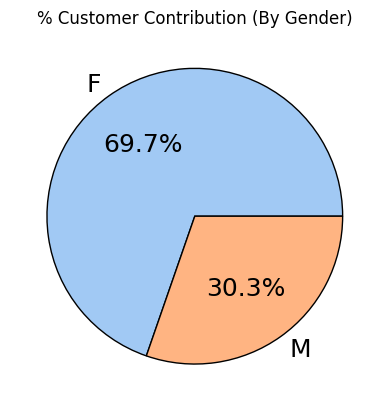

In [110]:
''' Customer Gender Split %'''

gender_count = diwali_df_v3.value_counts("Gender")
gender_count_percentage = (gender_count / gender_count.sum()) * 100

plt.pie(
    
    gender_count_percentage,
    colors=sns.color_palette("pastel"),
    startangle=0, 
    wedgeprops={"edgecolor": "black"},
    labels=diwali_df_v3["Gender"].unique(),
    textprops={"fontsize":18},
    autopct="%1.1f%%"
    )

plt.title("% Customer Contribution (By Gender)")



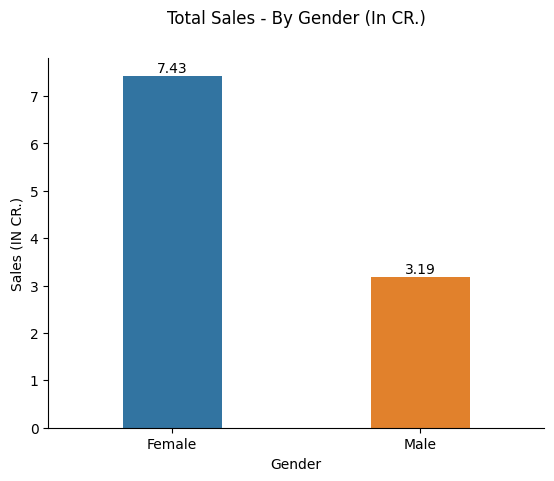

In [111]:
'''  Sales By Gender '''


sales_by_gender_df = diwali_df_v3.groupby("Gender", as_index=False)["Order Amount"].sum()
sales_by_gender_df["Order Amount"] = sales_by_gender_df["Order Amount"]/10000000
sales_by_gender_df["Order Amount"] = sales_by_gender_df["Order Amount"].round(2)
sales_by_gender_df["Gender"] = sales_by_gender_df["Gender"].map({"M": "Male", "F": "Female"})

sales_gender_barplot = sns.barplot(

            x= "Gender",
            y= "Order Amount",
            data = sales_by_gender_df,
            width = 0.4,
            hue = "Gender"

)

sales_gender_barplot.set_ylabel("Sales (IN CR.)")

for bars in sales_gender_barplot.containers:
    sales_gender_barplot.bar_label(bars)

sns.despine(top=True, right=True)    

plt.title("Total Sales - By Gender (In CR.)", pad=25)
plt.show()



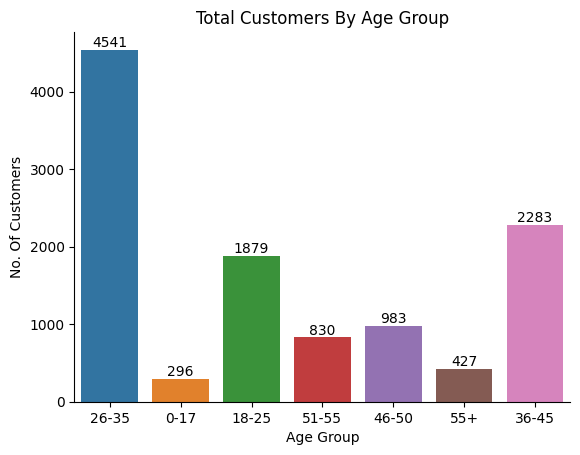

In [112]:
''' Age Group Analysis -  Customer Count '''

age_group_countplot = sns.countplot(x="Age Group", data= diwali_df_v3,hue= "Age Group")
age_group_countplot.set_ylabel("No. Of Customers")

for bars in age_group_countplot.containers:
    age_group_countplot.bar_label(bars)

sns.despine(top=True, right=True)        

plt.title("Total Customers By Age Group")
plt.show()

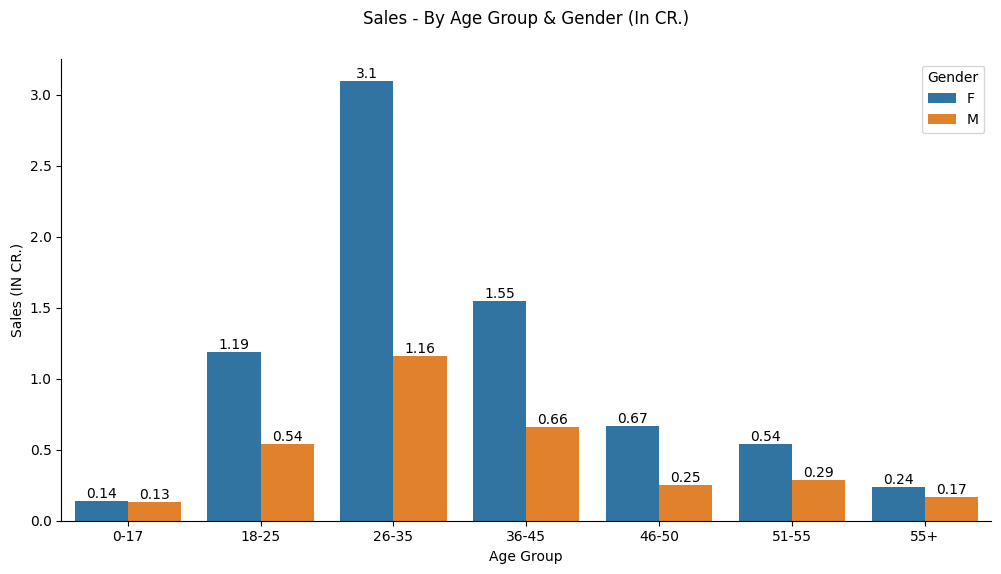

In [113]:
''' Age Group Analysis (By Gender) -  Sales '''

sales_by_gender_age_df = diwali_df_v3.groupby(["Age Group","Gender"], as_index=False)["Order Amount"].sum()
sales_by_gender_age_df["Order Amount"] = sales_by_gender_age_df["Order Amount"]/10000000
sales_by_gender_age_df["Order Amount"] = sales_by_gender_age_df["Order Amount"].round(2)


plt.figure(figsize=(12,6))

sales_gender_age_barplot = sns.barplot(

            x= "Age Group",
            y= "Order Amount",
            data = sales_by_gender_age_df,
            hue= "Gender",
            dodge= True

)

sales_gender_age_barplot.set_ylabel("Sales (IN CR.)")


for bars in sales_gender_age_barplot.containers:
    sales_gender_age_barplot.bar_label(bars)


sns.despine(top=True, right=True)    

plt.title("Sales - By Age Group & Gender (In CR.)", pad=25)
plt.show()


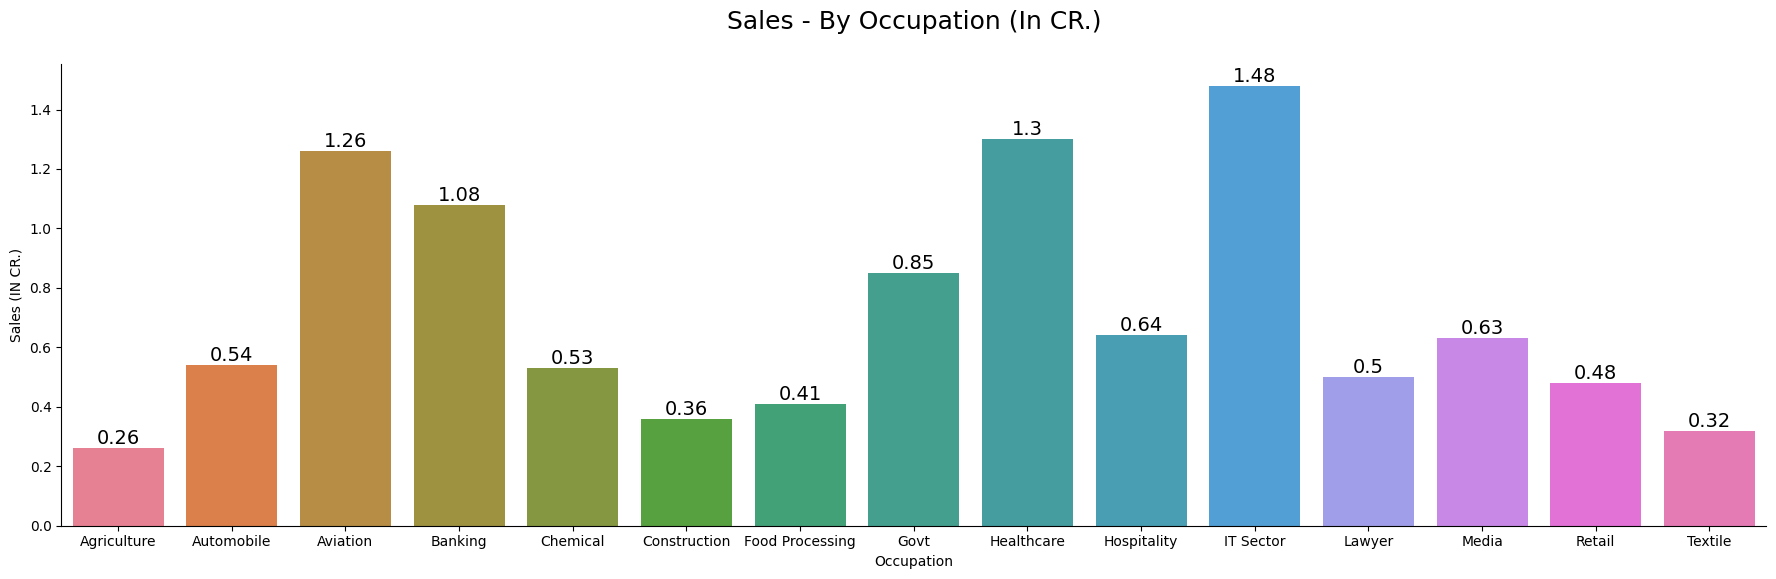

In [114]:
''' Occupation -  Sales '''

sales_by_occupation_df = diwali_df_v3.groupby("Occupation", as_index=False)["Order Amount"].sum()
sales_by_occupation_df["Order Amount"] = sales_by_occupation_df["Order Amount"]/10000000
sales_by_occupation_df["Order Amount"] = sales_by_occupation_df["Order Amount"].round(2)


plt.figure(figsize=(22,6))

sales_occupation_barplot = sns.barplot(

            x= "Occupation",
            y= "Order Amount",
            data = sales_by_occupation_df,
            hue= "Occupation"

)

sales_occupation_barplot.set_ylabel("Sales (IN CR.)")


for bars in sales_occupation_barplot.containers:
    sales_occupation_barplot.bar_label(bars,fontsize=14)


sns.despine(top=True, right=True)    

plt.title("Sales - By Occupation (In CR.)", pad=25,fontsize=18)
plt.show()

**Customer Analysis (By Gender)** <br>
Majority of customers are Females (69.7 %) and they generate more than double the sales than Males. <br>
<br>
**Customer Analysis (By Age Group)** <br>
People aged between 26-35 Years comprise the largest group of customers (4541) and contribute highest to the sales. <br>
Females generated more amount of sales in all age groups, the closest sales similarity in both genders was observed in age group 0-17. <br>
<br>
**Customer Analysis (By Occupation)** <br>
Employees in Sectors - IT, Aviation, Healthcare contribute highest to the sales while those in Textile & Agriculture contrubute the least. <br>

#### EXPLORATORY DATA ANALYSIS (GEOGRAPHICAL ATTRIBUTES)

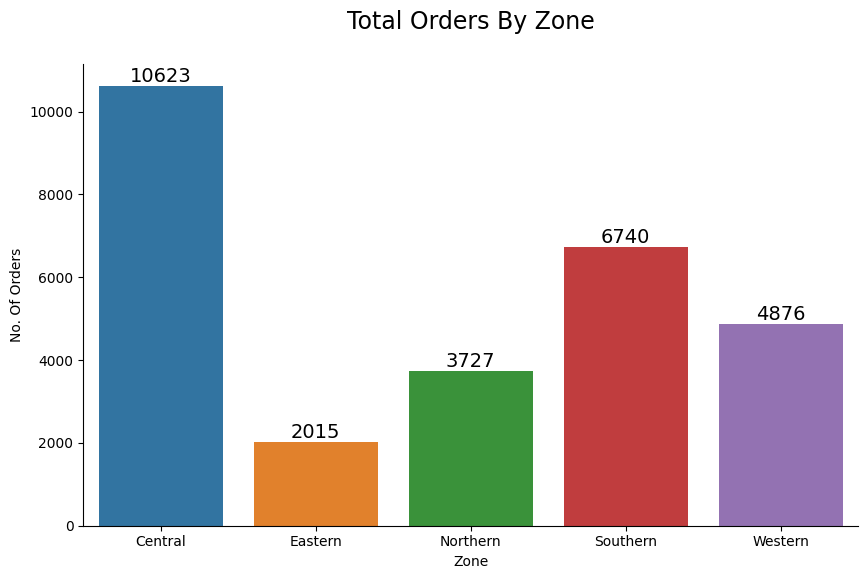

In [115]:
''' Order Count - Zone '''

orders_by_zone_df = diwali_df_v3.groupby(["Zone"], as_index=False)["Orders"].sum()

plt.figure(figsize=(10,6))

orders_by_zone_barplot = sns.barplot(

            x= "Zone",
            y= "Orders",
            data = orders_by_zone_df,
            hue= "Zone"

)

orders_by_zone_barplot.set_ylabel("No. Of Orders")


for bars in orders_by_zone_barplot.containers:
    orders_by_zone_barplot.bar_label(bars, fontsize=14)


sns.despine(top=True, right=True)    

plt.title("Total Orders By Zone", pad=25, fontsize=17)
plt.show()

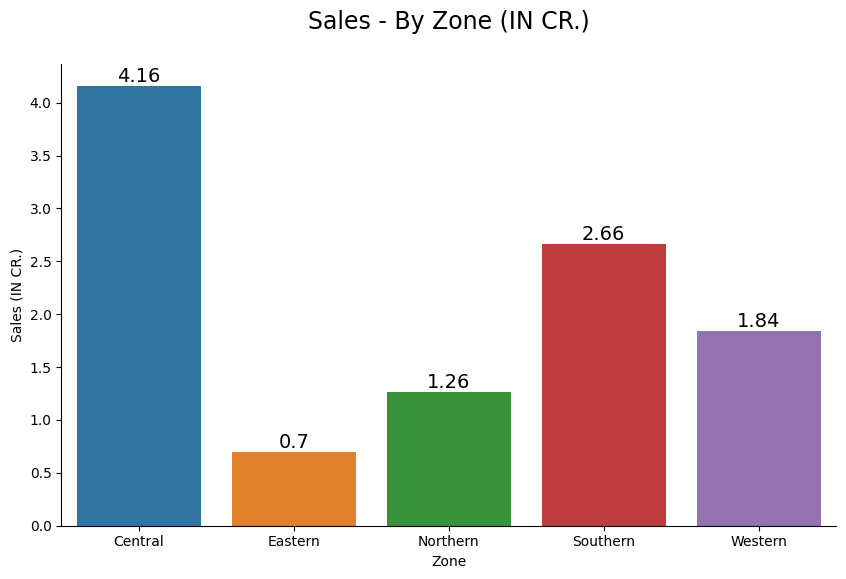

In [116]:
''' Sales - Zone '''

sales_by_zone_df = diwali_df_v3.groupby(["Zone"], as_index=False)["Order Amount"].sum()
sales_by_zone_df["Order Amount"] = sales_by_zone_df["Order Amount"]/10000000
sales_by_zone_df["Order Amount"] = sales_by_zone_df["Order Amount"].round(2)


plt.figure(figsize=(10,6))

sales_by_zone_barplot = sns.barplot(

            x= "Zone",
            y= "Order Amount",
            data = sales_by_zone_df,
            hue= "Zone"

)

sales_by_zone_barplot.set_ylabel("Sales (IN CR.)")


for bars in sales_by_zone_barplot.containers:
    sales_by_zone_barplot.bar_label(bars, fontsize=14)


sns.despine(top=True, right=True)    

plt.title("Sales - By Zone (IN CR.)", pad=25, fontsize=17)
plt.show()

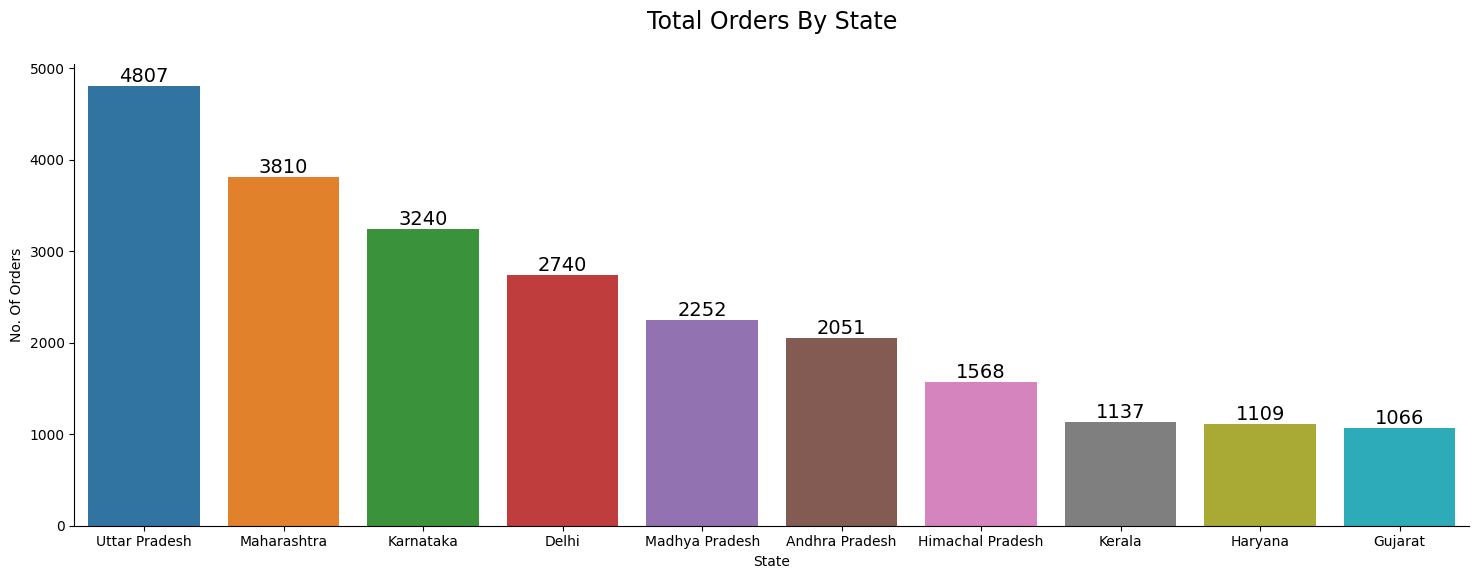

In [117]:
''' Order Count - Top 10 States '''

orders_by_state_df = diwali_df_v3.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders",ascending= False).head(10)

plt.figure(figsize=(18,6))

orders_by_state_barplot = sns.barplot(

            x= "State",
            y= "Orders",
            data = orders_by_state_df,
            hue= "State"

)

orders_by_state_barplot.set_ylabel("No. Of Orders")


for bars in orders_by_state_barplot.containers:
    orders_by_state_barplot.bar_label(bars, fontsize=14)


sns.despine(top=True, right=True)    

plt.title("Total Orders By State", pad=25, fontsize=17)
plt.show()

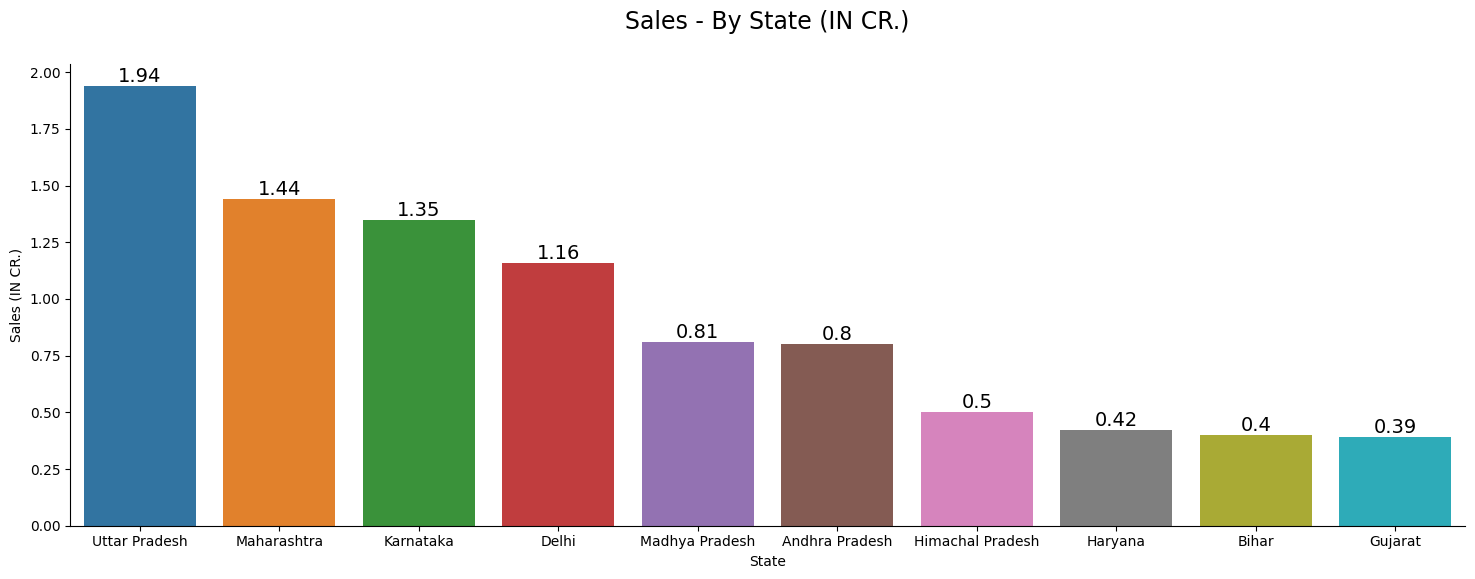

In [118]:
''' Sales - State (Top 10) '''

sales_by_state_df = diwali_df_v3.groupby(["State"], as_index=False)["Order Amount"].sum().sort_values(by="Order Amount",ascending= False).head(10)
sales_by_state_df["Order Amount"] = sales_by_state_df["Order Amount"]/10000000
sales_by_state_df["Order Amount"] = sales_by_state_df["Order Amount"].round(2)


plt.figure(figsize=(18,6))

sales_by_state_barplot = sns.barplot(

            x= "State",
            y= "Order Amount",
            data = sales_by_state_df,
            hue= "State"

)

sales_by_state_barplot.set_ylabel("Sales (IN CR.)")


for bars in sales_by_state_barplot.containers:
    sales_by_state_barplot.bar_label(bars, fontsize=14)


sns.despine(top=True, right=True)    

plt.title("Sales - By State (IN CR.)", pad=25, fontsize=17)
plt.show()

**Orders & Sales Analysis (By Zone)** <br>
Central Zone contributed most to the number of orders followed by Southern Zone, similar trend is observed in sales contribution. <br>
<br>
**Orders & Sales Analysis (By State)** <br>
UP, Maharashtra & Karnataka had the highest order & sales contribution respectively. <br> 
Kerala was in Top 10 States for order contribution however that wasn't the same incase of sales contribution. <br>

#### EXPLORATORY DATA ANALYSIS (PRODUCT CATEGORY & PRODUCT)

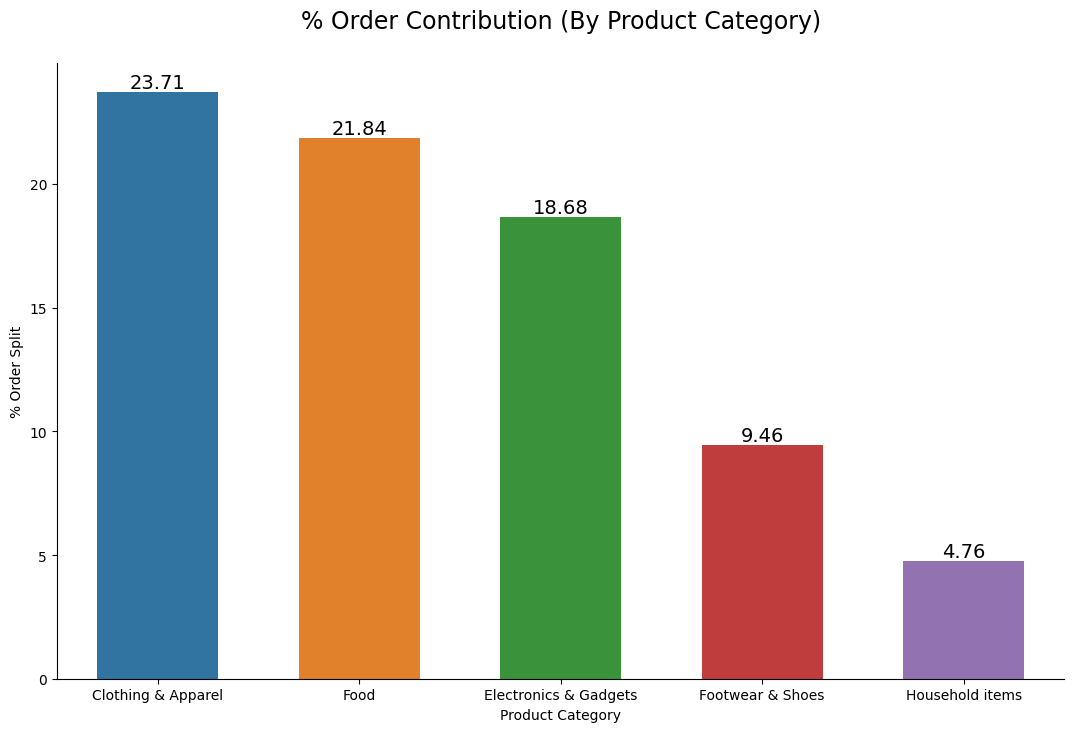

In [119]:
''' % Order Split Product Category - Top 5 Categories '''

orders_by_category_df = diwali_df_v3.groupby(["Product Category"], as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)
orders_by_category_df["Percentage Contribution"] = (orders_by_category_df["Orders"]/ orders_by_category_df["Orders"].sum()) * 100
orders_by_category_df["Percentage Contribution"] = orders_by_category_df["Percentage Contribution"].round(2)

plt.figure(figsize=(13,8))

orders_by_category_barplot = sns.barplot(

            x= "Product Category",
            y= "Percentage Contribution",
            data = orders_by_category_df.head(5),
            hue= "Product Category",
            width= 0.6

)

orders_by_category_barplot.set_ylabel("% Order Split")


for bars in orders_by_category_barplot.containers:
    orders_by_category_barplot.bar_label(bars, fontsize=14)


sns.despine(top=True, right=True)    

plt.title("% Order Contribution (By Product Category)", pad=25, fontsize=17)
plt.show()

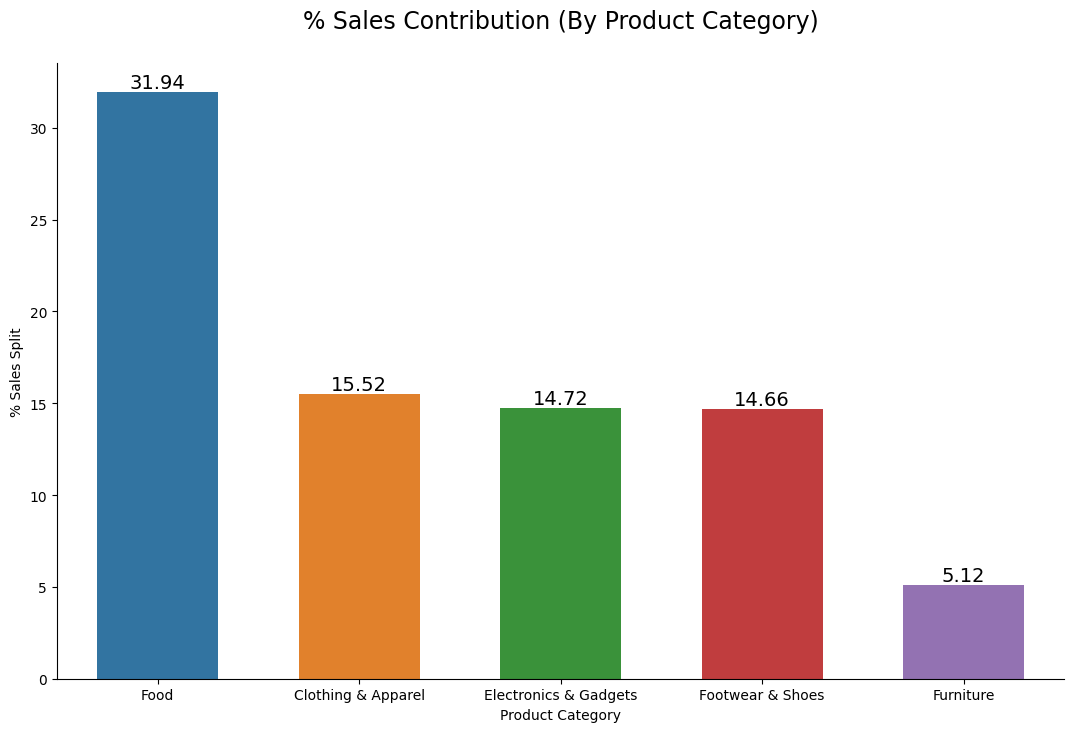

In [120]:
''' % Sales Split Product Category - Top 5 Categories '''

sales_by_category_df = diwali_df_v3.groupby(["Product Category"], as_index=False)["Order Amount"].sum().sort_values(by="Order Amount",ascending=False)
sales_by_category_df["Percentage Contribution"] = (sales_by_category_df["Order Amount"]/ sales_by_category_df["Order Amount"].sum()) * 100
sales_by_category_df["Percentage Contribution"] = sales_by_category_df["Percentage Contribution"].round(2)

plt.figure(figsize=(13,8))

sales_by_category_barplot = sns.barplot(

            x= "Product Category",
            y= "Percentage Contribution",
            data = sales_by_category_df.head(5),
            hue= "Product Category",
            width= 0.6

)

sales_by_category_barplot.set_ylabel("% Sales Split")


for bars in sales_by_category_barplot.containers:
    sales_by_category_barplot.bar_label(bars, fontsize=14)


sns.despine(top=True, right=True)    

plt.title("% Sales Contribution (By Product Category)", pad=25, fontsize=17)
plt.show()

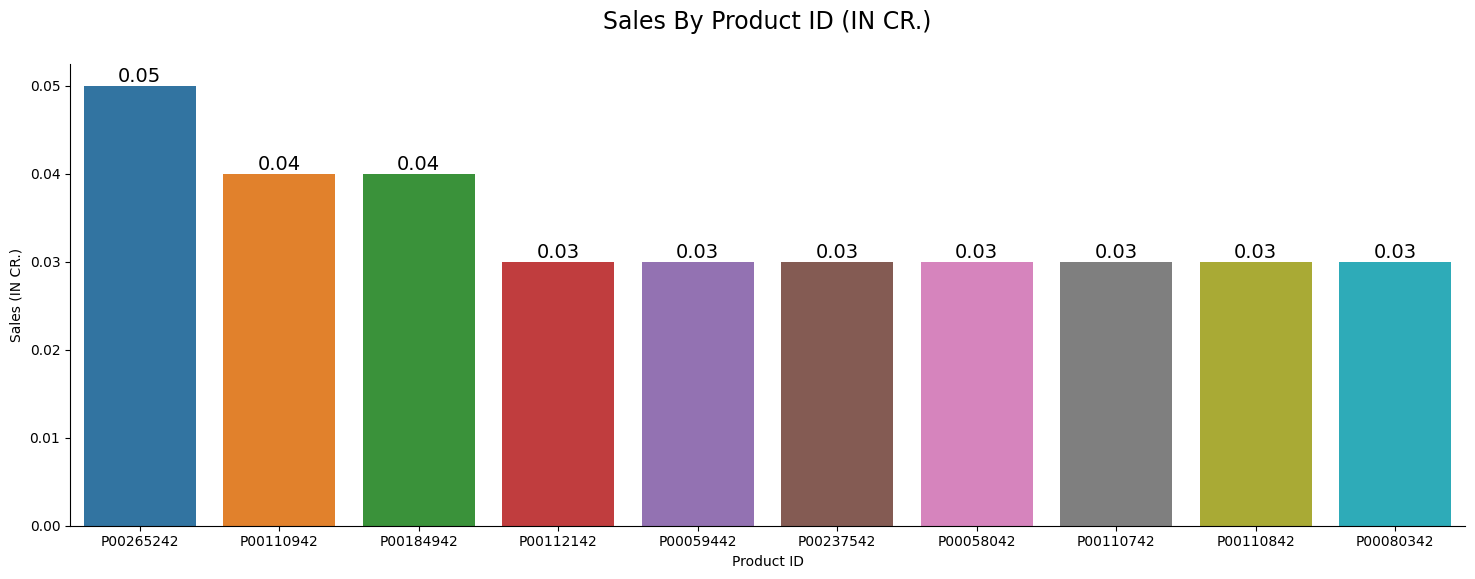

In [121]:
''' Top 10 Product IDs - Sales'''

sales_by_sku_df = diwali_df_v3.groupby(["Product ID"], as_index=False)["Order Amount"].sum().sort_values(by="Order Amount",ascending= False).head(10)
sales_by_sku_df["Order Amount"] = sales_by_sku_df["Order Amount"]/10000000
sales_by_sku_df["Order Amount"] = sales_by_sku_df["Order Amount"].round(2)


plt.figure(figsize=(18,6))

sales_by_sku_barplot = sns.barplot(

            x= "Product ID",
            y= "Order Amount",
            data = sales_by_sku_df,
            hue= "Product ID"

)

sales_by_sku_barplot.set_ylabel("Sales (IN CR.)")


for bars in sales_by_sku_barplot.containers:
    sales_by_sku_barplot.bar_label(bars, fontsize=14)


sns.despine(top=True, right=True)    

plt.title("Sales By Product ID (IN CR.)", pad=25, fontsize=17)
plt.show()

**Orders & Sales Analysis (By Product Category)** <br>
<br>
Categories - Food, Clothing, Electronics & Footwear were in the Top 5 Categories in terms of sales & orders. <br>
While Clothing contributed to most number of Orders, Food generated the most sales with lesser number of orders than Clothing. <br> 
While Household Items was the 5th most ordered category, Furniture generated more sales and was the 5th most sold category. <br>
Overall Top 5 Ordered Categories contributed to 78.4 % of orders and Top 5 Sold Categories contributed to 82 % of Sales<br>
<br>
**Sales Analysis (By Product)** <br>
While Top 10 Product IDs had similar sales, Product ID - P0026524 generated the most sales (₹5 Lakhs) <br>